# LOAN PREDICTION USING ML (MACHINE LEARNING)

## IMPORT ALL THE LIBRARY IS NEEDED

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## GATHER THE DATASET TO THE GITHUB

In [91]:
old_customer=pd.read_csv(r"c:\Users\PRAVEEN KUMAR\Desktop\MY PROJECT\Loan train data.csv")

In [92]:
old_customer

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [93]:
old_customer.shape

(614, 13)

## CHECK  THE MISSING VALUE, IF ITS PRESENT

In [94]:
old_customer.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [95]:
old_customer.isnull().sum().sum()


np.int64(149)

### THE MISSING VALUSE IS PRESENT, SO LET'S FIND OUT HOW MANY MISSING VALUE ARE PRESENT

In [96]:
perceentage1=(old_customer.isnull().sum()/old_customer.shape[0])*100
print(perceentage1)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [97]:
(old_customer.isnull().sum().sum()/(old_customer.shape[0]*old_customer.shape[1]))*100

np.float64(1.8667000751691305)

### THE TOTAL MISSING VALUE ARE PRESENT IS 1.86%, SO I CAN TAKEN THE DECISSION FILL THE MISSING VALUE.
### GRAPHICALLY SHOW THE HOW MUCH MISSING VALUE IS PRESENTED 

<Axes: >

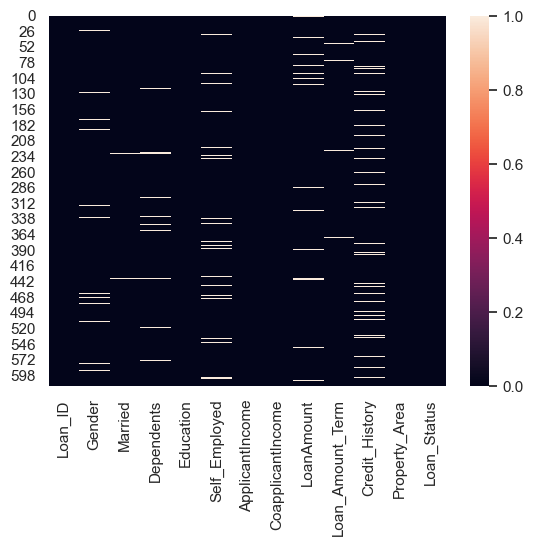

In [98]:
sns.heatmap(old_customer.isnull())

### TAKE THE INFORMATION ABOUT DATASET, IT CAN BE HELPFULL FOR THE FILL MISSING VALUE 

In [99]:
old_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### FIRST I CAN FILL OBJECT VALUES USING THE FILLNA() FUNCTION,IT CAN BE THE FILLING MISSING VALUE IF COLUMN HAS TAKEN ONLY 1 AND 2 UNIQUNIC VALUES.IT IS PERFOMED LIKE BOOLEAN, THAT CAN BE USED FOR THE COLUMN ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]. I CAN USE THE MODE FOR THE FILL IN THE CATEGORICALL MISSING VALUE.  

In [100]:
old_customer["Gender"].fillna(old_customer["Gender"].mode()[0],inplace=True)
old_customer["Married"].fillna(old_customer["Married"].mode()[0],inplace=True)
old_customer["Dependents"].fillna(old_customer["Dependents"].mode()[0],inplace=True)
old_customer["Education"].fillna(old_customer["Education"].mode()[0],inplace=True)
old_customer["Self_Employed"].fillna(old_customer["Self_Employed"].mode()[0],inplace=True)
old_customer["Property_Area"].fillna(old_customer["Property_Area"].mode()[0],inplace=True)
old_customer["Loan_Status"].fillna(old_customer["Loan_Status"].mode()[0],inplace=True)
old_customer.isnull().sum()

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\172114167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  old_customer["Gender"].fillna(old_customer["Gender"].mode()[0],inplace=True)
C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\172114167.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 ### THAT CAN BE USED FOR THE COLUMN ["LoanAmount","Loan_Amount_Term","Credit_History"]. I CAN USE THE MEAN FOR THE FILL IN THE NUMERICAL MISSING VALUE.  

old_customer["ApplicantIncome"].fillna(old_customer["ApplicantIncome"].mean()[0],inplace=True)
old_customer["CoapplicantIncome"].fillna(old_customer["CoapplicantIncome"].mean()[0],inplace=True)
old_customer["LoanAmount"].fillna(old_customer["LoanAmount"].mean()[0],inplace=True)
old_customer["Loan_Amount_Term"].fillna(old_customer["Loan_Amount_Term"].mean()[0],inplace=True)
old_customer["Credit_History"].fillna(old_customer["Credit_History"].mean()[0],inplace=True)
old_customer.isnull().sum()

In [101]:
old_customer.LoanAmount.fillna(old_customer.LoanAmount.mean(),inplace=True)
old_customer.Loan_Amount_Term.fillna(old_customer.Loan_Amount_Term.mean(),inplace=True)
old_customer.Credit_History.fillna(old_customer.Credit_History.mean(),inplace=True)
old_customer.isnull().sum()

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2646366391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  old_customer.LoanAmount.fillna(old_customer.LoanAmount.mean(),inplace=True)
C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2646366391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### CHECK AGAIN THE MISSING VALUES IS FILLED OR NOT USING HEATMAP

<Axes: >

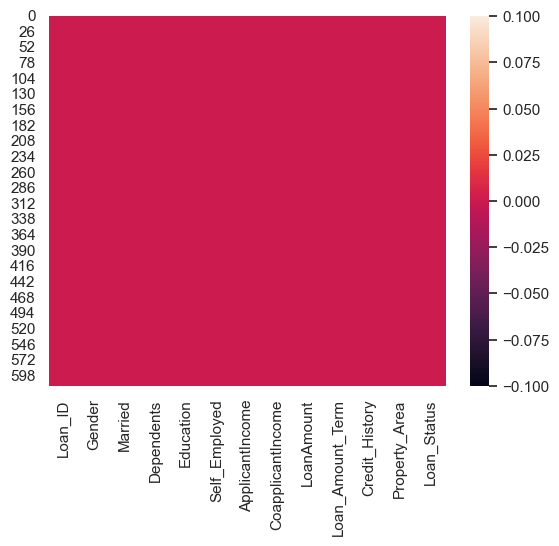

In [102]:
sns.heatmap(old_customer.isnull())

## CHANGE THE DATATYPE

In [103]:
en_data = old_customer[["Gender","Married","Education","Self_Employed","Loan_Status"]]

In [104]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender_Female           614 non-null    bool 
 1   Gender_Male             614 non-null    bool 
 2   Married_No              614 non-null    bool 
 3   Married_Yes             614 non-null    bool 
 4   Education_Graduate      614 non-null    bool 
 5   Education_Not Graduate  614 non-null    bool 
 6   Self_Employed_No        614 non-null    bool 
 7   Self_Employed_Yes       614 non-null    bool 
 8   Loan_Status_N           614 non-null    bool 
 9   Loan_Status_Y           614 non-null    bool 
dtypes: bool(10)
memory usage: 6.1 KB


# USE THE ONEHOTENCODER

### I CAN USED THE SKLEARN ONEHOTENCODER() FUNCTON, IT IS CONVERT THE BOOLEAN DATATYPE (CATEGORICAL) INTO THE NUMBERIC 0 AND 1 ONLY.

In [105]:
ohe = OneHotEncoder(drop="first")
ar = ohe.fit_transform(en_data).toarray()
print(ar)

[[1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1.]
 ...
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [106]:
la = pd.DataFrame(ar,columns=["Gender_M","Married_YES","Education_Not Graduate","Self_Employed_Yes","Loan_Status_Y"])

In [107]:
la

,Gender_M,Married_YES,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,1.0
610,1.0,1.0,0.0,0.0,1.0
611,1.0,1.0,0.0,0.0,1.0
612,1.0,1.0,0.0,0.0,1.0


In [108]:
old_customer["Gender"] = la["Gender_M"]
old_customer["Married"] = la["Married_YES"]
old_customer["Education"] = la["Education_Not Graduate"]
old_customer["Self_Employed"] = la["Self_Employed_Yes"]
old_customer["Loan_Status"] = la["Loan_Status_Y"]
old_customer

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0.0
2,LP001005,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1.0
3,LP001006,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1.0
4,LP001008,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,Rural,1.0
610,LP002979,1.0,1.0,3+,0.0,0.0,4106,0.0,40.000000,180.0,1.0,Rural,1.0
611,LP002983,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,Urban,1.0
612,LP002984,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,Urban,1.0


#### IN GENDER COLUMN MALE VALUE IS 1,AND FEMALE VALUE IS 0.
#### IN MARRIED COLUMN MARRIED VALUE IS 1,AND UNMARRIED VALUE IS 0.
#### IN EDUCATION COLUMN EDUCATED VALUE IS 1,AND UNEDUCATED VALUE IS 0.
#### IN SELF_EMPLOYED COLUMN YES VALUE IS 1,AND NO VALUE IS 0.
#### IN LOAN_STATUS COLUMN YES VALUE IS 1,AND NO VALUE IS 0.

# USE THE LABELENCODER

### I CAN USED THE SKLEARN LABELENCODER() FUNCTON, IT IS CONVERT THE (COLUMN HAS TAKEN THE 2 OR MORE THAN 2 UNIQUNIC CATEGORICAL VALUES) INTO THE NUMBERICS

In [109]:
le = LabelEncoder()
le.fit(old_customer["Property_Area"])

LabelEncoder()

In [110]:
lb = le.transform(old_customer["Property_Area"])
lb

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

In [111]:
old_customer["Property_Area"] = lb
old_customer

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0,1.0
610,LP002979,1.0,1.0,3+,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0,1.0
611,LP002983,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2,1.0
612,LP002984,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2,1.0


In [112]:
old_customer["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [113]:
le.fit(old_customer["Dependents"])

LabelEncoder()

In [114]:
lb1 = le.transform(old_customer["Dependents"])

In [115]:
old_customer["Dependents"] = lb1
old_customer

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0,1.0
610,LP002979,1.0,1.0,3,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0,1.0
611,LP002983,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2,1.0
612,LP002984,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2,1.0


### IN PROPERTY_AREA COLUMN RURAL VALUE IS 0, SEMIURBAN VALUE IS 1,AND URBAN VALUE IS 2.

## CHECK AGAIN THE COLUMNS DATA TYPE

In [116]:
old_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 62.5+ KB


### CHECK THE OUTLIEARS IS PRESENT OR NOT USING BOXPLOT

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\1573569292.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Married", y = "LoanAmount", data=old_customer,palette='rainbow')


<Axes: xlabel='Married', ylabel='LoanAmount'>

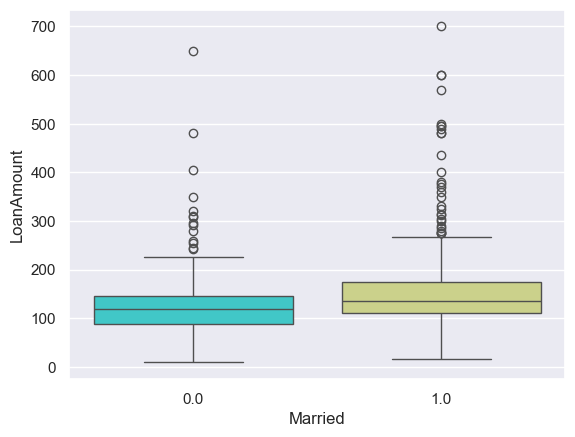

In [117]:
sns.boxplot(x = "Married", y = "LoanAmount", data=old_customer,palette='rainbow')


C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\3455345975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Dependents", y = "LoanAmount", data=old_customer,palette='rainbow')


<Axes: xlabel='Dependents', ylabel='LoanAmount'>

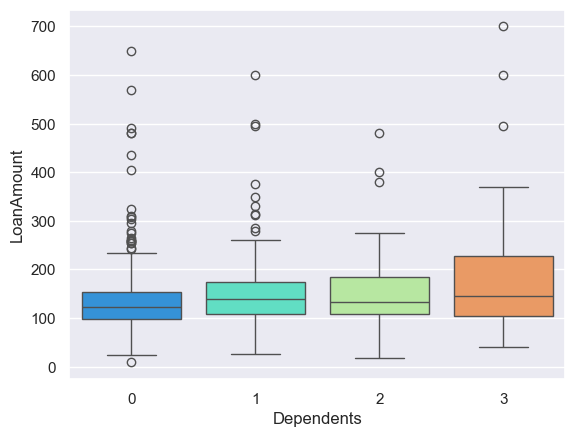

In [118]:
sns.boxplot(x = "Dependents", y = "LoanAmount", data=old_customer,palette='rainbow')

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\4184726009.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Self_Employed", y = "LoanAmount", data=old_customer,palette='rainbow')


<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

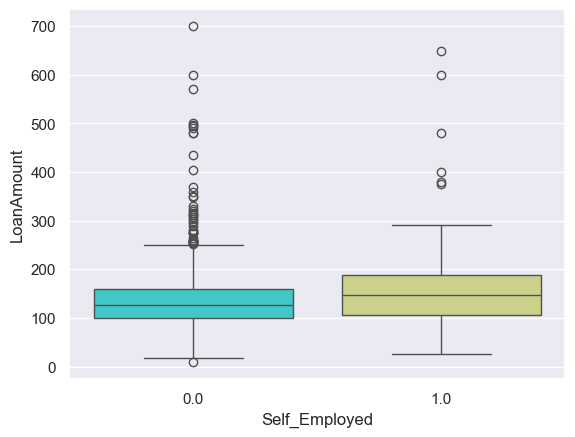

In [119]:
sns.boxplot(x = "Self_Employed", y = "LoanAmount", data=old_customer,palette='rainbow')

In [120]:
old_customer.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


## IQR MATHOD
### THE OUTLIEARS IS PRESENT SO DROP THE OUTLIERS USING. 

In [121]:
q1 = old_customer["CoapplicantIncome"].quantile(0.25)
q2 = old_customer["CoapplicantIncome"].quantile(0.75)
q1,q2

(np.float64(0.0), np.float64(2297.25))

In [122]:
IQR = q2-q1
IQR

np.float64(2297.25)

In [123]:
min_range = q1 - (1.5*IQR)
max_range = q2 + (1.5*IQR)
min_range,max_range

(np.float64(-3445.875), np.float64(5743.125))

In [124]:
new_data = old_customer[old_customer["CoapplicantIncome"]<= max_range]
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0,1.0
610,LP002979,1.0,1.0,3,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0,1.0
611,LP002983,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2,1.0
612,LP002984,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2,1.0


In [125]:
new_data.shape

(596, 13)

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2901872486.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["CoapplicantIncome"])


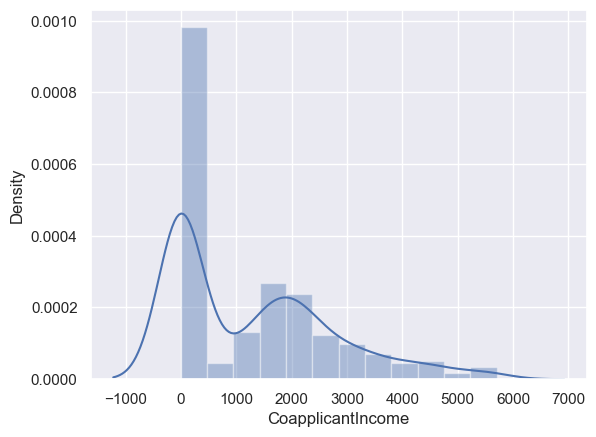

In [126]:
sns.distplot(new_data["CoapplicantIncome"])
plt.show()

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\1356067078.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "CoapplicantIncome",data=new_data, palette='rainbow')


<Axes: xlabel='CoapplicantIncome'>

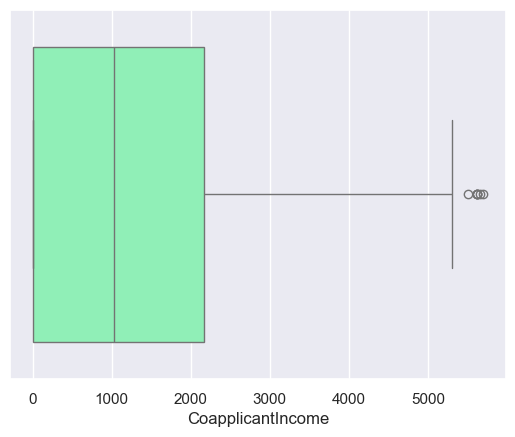

In [127]:
sns.boxplot(x = "CoapplicantIncome",data=new_data, palette='rainbow')

In [128]:
q3 = old_customer["ApplicantIncome"].quantile(0.25)
q4 = old_customer["ApplicantIncome"].quantile(0.75)
q3,q4

(np.float64(2877.5), np.float64(5795.0))

In [129]:
IQR1 = q4-q3
IQR1

np.float64(2917.5)

In [130]:
min_range1 = q3 - (1.5*IQR1)
max_range1 = q4 + (1.5*IQR1)
min_range1,max_range1

(np.float64(-1498.75), np.float64(10171.25))

In [131]:
new_data = old_customer[old_customer["ApplicantIncome"]<= max_range1]
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0,1.0
610,LP002979,1.0,1.0,3,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0,1.0
611,LP002983,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2,1.0
612,LP002984,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2,1.0


In [132]:
new_data.shape

(564, 13)

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2236040785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["ApplicantIncome"])


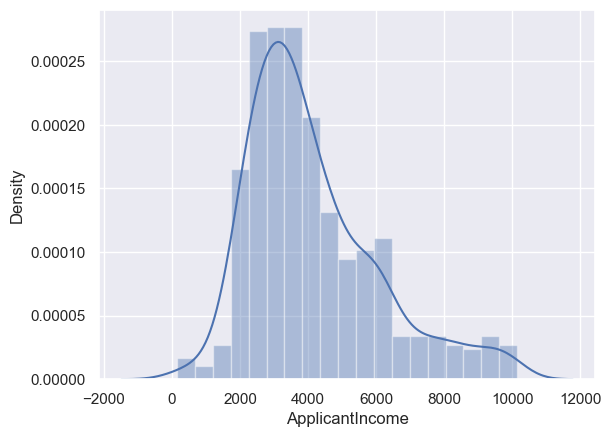

In [133]:
sns.distplot(new_data["ApplicantIncome"])
plt.show()

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\1149075697.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "ApplicantIncome", data=new_data,palette='rainbow')


<Axes: xlabel='ApplicantIncome'>

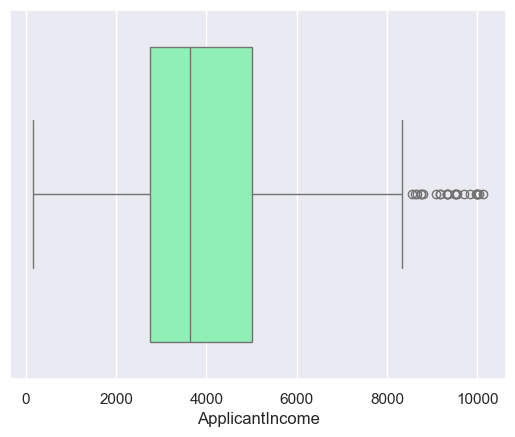

In [134]:
sns.boxplot(x = "ApplicantIncome", data=new_data,palette='rainbow')

In [135]:
q5 = old_customer["LoanAmount"].quantile(0.25)
q6 = old_customer["LoanAmount"].quantile(0.75)
q5,q6

(np.float64(100.25), np.float64(164.75))

In [136]:
IQR2 = q6-q5
IQR2

np.float64(64.5)

In [137]:
min_range2 = q5 - (1.5*IQR2)
max_range2 = q6 + (1.5*IQR2)
min_range2,max_range2

(np.float64(3.5), np.float64(261.5))

In [138]:
new_data = old_customer[old_customer["LoanAmount"]<= max_range2]
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0,1.0
610,LP002979,1.0,1.0,3,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0,1.0
611,LP002983,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2,1.0
612,LP002984,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2,1.0


In [139]:
new_data.shape

(573, 13)

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\4240272628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["LoanAmount"])


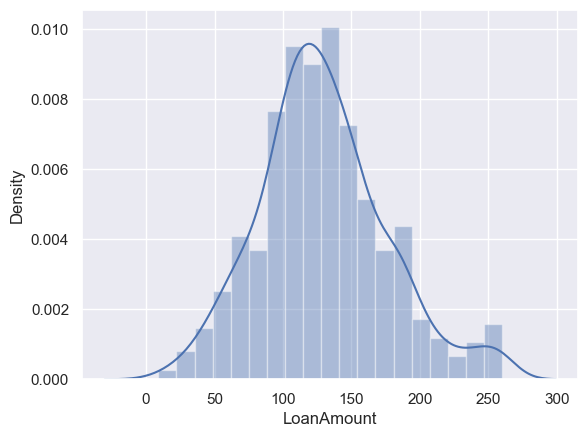

In [140]:
sns.distplot(new_data["LoanAmount"])
plt.show()

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\4048052071.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "LoanAmount",data=new_data,palette='rainbow')


<Axes: xlabel='LoanAmount'>

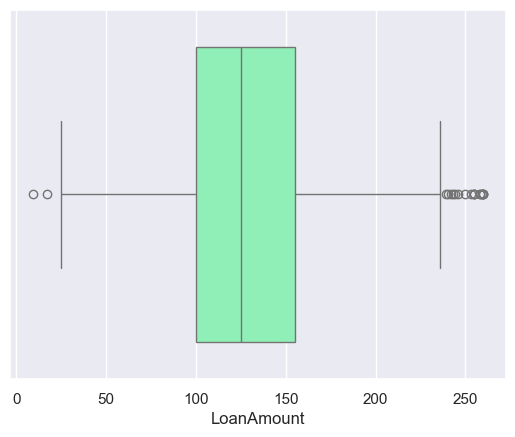

In [141]:
sns.boxplot(x = "LoanAmount",data=new_data,palette='rainbow')

In [142]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            573 non-null    object 
 1   Gender             573 non-null    float64
 2   Married            573 non-null    float64
 3   Dependents         573 non-null    int64  
 4   Education          573 non-null    float64
 5   Self_Employed      573 non-null    float64
 6   ApplicantIncome    573 non-null    int64  
 7   CoapplicantIncome  573 non-null    float64
 8   LoanAmount         573 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     573 non-null    float64
 11  Property_Area      573 non-null    int64  
 12  Loan_Status        573 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 62.7+ KB


## CHECK THE DUPLICATE DATA IS PRESENT OR NOT

In [143]:
new_data.duplicated().sum()

np.int64(0)

## NORMALISATION TECHNIQUES
### USING THE MINMAXSCALER() FUNCTION

In [144]:
mms = MinMaxScaler()
mms.fit(new_data[["CoapplicantIncome"]])

co1 = mms.transform(new_data[["CoapplicantIncome"]])
new_data["CoapplicantIncome"] = co1


C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\736659238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["CoapplicantIncome"] = co1


In [145]:
mms.fit(new_data[["ApplicantIncome"]])

ap1 = mms.transform(new_data[["ApplicantIncome"]])
new_data["ApplicantIncome"] = ap1


C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2083965963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["ApplicantIncome"] = ap1


In [146]:
mms.fit(new_data[["LoanAmount"]])

la1 = mms.transform(new_data[["LoanAmount"]])
new_data["LoanAmount"] = la1

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\1295214381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["LoanAmount"] = la1


In [147]:
mms.fit(new_data[["Loan_Amount_Term"]])

la2 = mms.transform(new_data[["Loan_Amount_Term"]])
new_data["Loan_Amount_Term"] = la2

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\589206516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Loan_Amount_Term"] = la2


In [148]:
new_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.00000,573.000000
mean,0.813264,0.645724,0.705061,0.232112,0.127400,0.115391,0.043702,0.478846,0.705061,0.841010,1.04014,0.692845
std,0.390040,0.478711,0.981610,0.422549,0.333711,0.093567,0.069411,0.185278,0.138454,0.351412,0.78455,0.461717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.067159,0.000000,0.362550,0.743590,1.000000,0.00000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.090802,0.035760,0.462151,0.743590,1.000000,1.00000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.130779,0.065697,0.581673,0.743590,1.000000,2.00000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000


## NORMALISATION

In [149]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(new_data[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [150]:
new_data["CoapplicantIncome"] = ft.transform(new_data[["CoapplicantIncome"]])

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\1647458292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["CoapplicantIncome"] = ft.transform(new_data[["CoapplicantIncome"]])


C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\4152030396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(old_customer["CoapplicantIncome"])
C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\4152030396.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["Coapplica

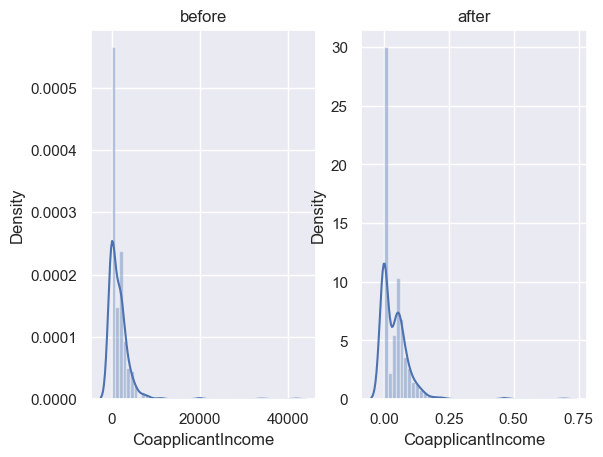

In [151]:
plt.subplot(1,2,1)
sns.distplot(old_customer["CoapplicantIncome"])
plt.title("before")

plt.subplot(1,2,2)
sns.distplot(new_data["CoapplicantIncome"])
plt.title("after")

plt.show()

In [152]:
ft.fit(new_data[["ApplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [153]:
new_data["ApplicantIncome"] = ft.transform(new_data[["ApplicantIncome"]])

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\4269858561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["ApplicantIncome"] = ft.transform(new_data[["ApplicantIncome"]])


C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2915581610.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(old_customer["ApplicantIncome"])
C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2915581610.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["ApplicantIn

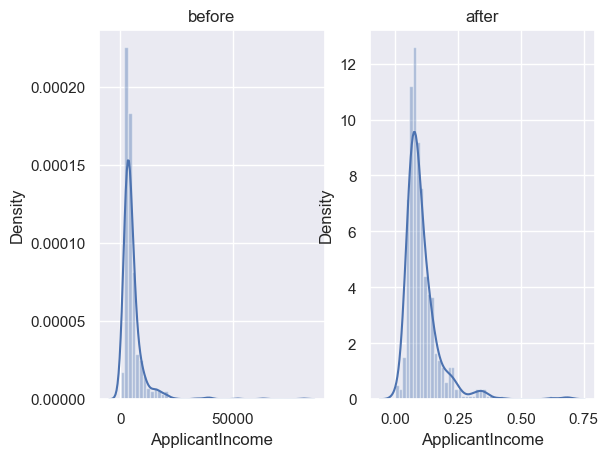

In [154]:
plt.subplot(1,2,1)
sns.distplot(old_customer["ApplicantIncome"])
plt.title("before")

plt.subplot(1,2,2)
sns.distplot(new_data["ApplicantIncome"])
plt.title("after")

plt.show()

In [155]:
ft.fit(new_data[["LoanAmount"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [156]:
new_data["LoanAmount"] = ft.transform(new_data[["LoanAmount"]])

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2356489657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["LoanAmount"] = ft.transform(new_data[["LoanAmount"]])


C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2600970452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(old_customer["LoanAmount"])
C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_23104\2600970452.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["LoanAmount"])


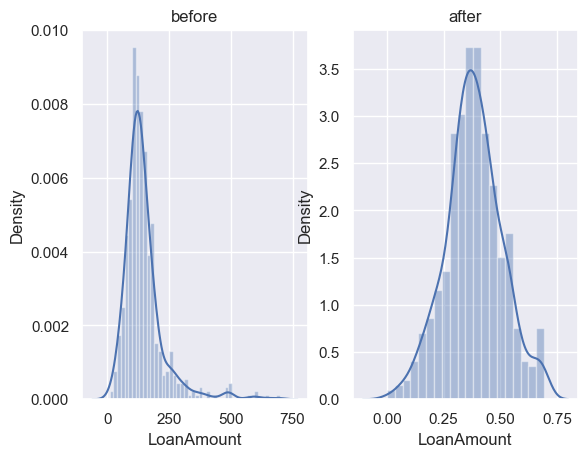

In [157]:
plt.subplot(1,2,1)
sns.distplot(old_customer["LoanAmount"])
plt.title("before")

plt.subplot(1,2,2)
sns.distplot(new_data["LoanAmount"])
plt.title("after")

plt.show()

## Quickly understand the data

<Axes: xlabel='Credit_History', ylabel='count'>

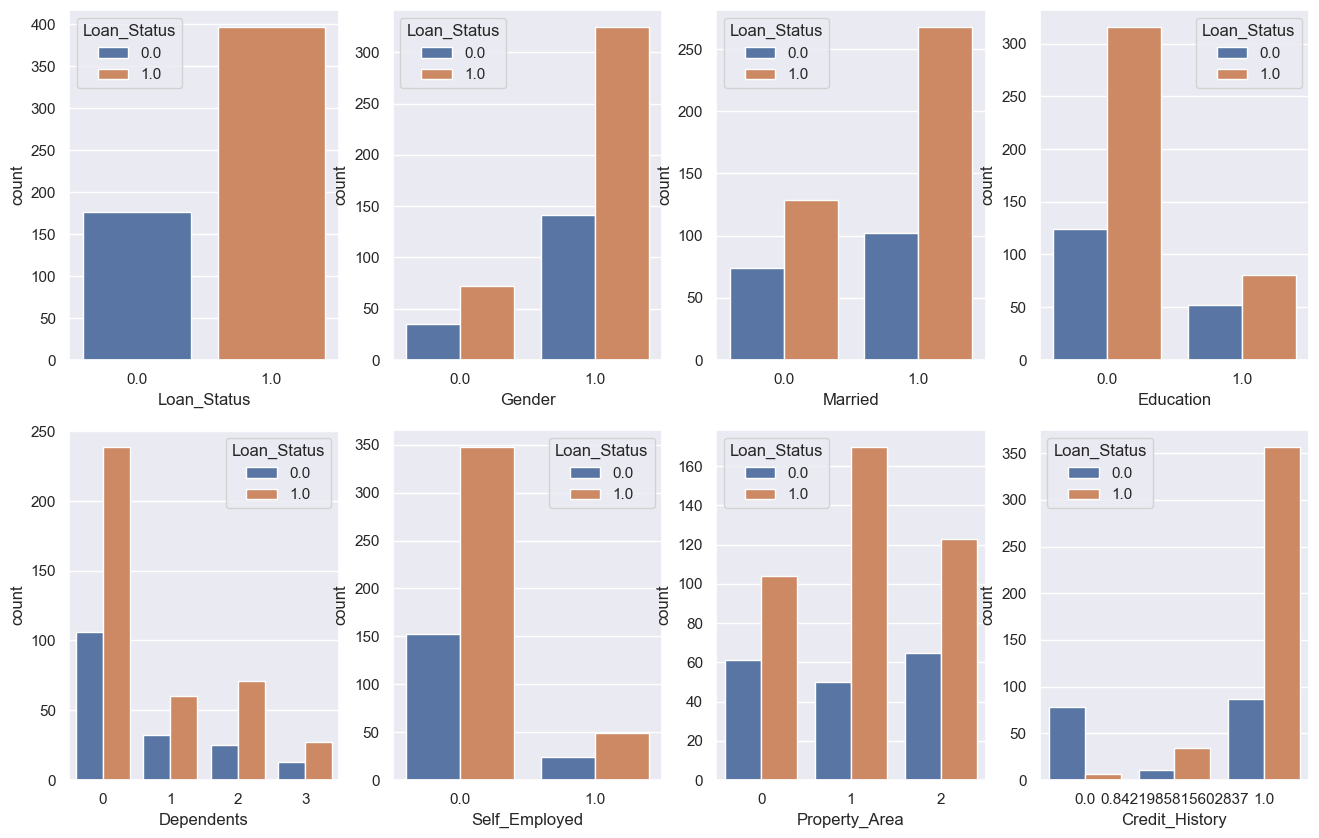

In [158]:
#visualisation the data

fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(x='Loan_Status', data = new_data,  hue = "Loan_Status", ax=ax[0][0])
sns.countplot(x='Gender', data=new_data,  hue = "Loan_Status", ax=ax[0][1])
sns.countplot(x='Married', data=new_data,  hue = "Loan_Status", ax=ax[0][2])
sns.countplot(x='Education', data=new_data,  hue = "Loan_Status", ax=ax[0][3])
sns.countplot(x='Dependents', data=new_data,  hue = "Loan_Status", ax=ax[1][0])
sns.countplot(x='Self_Employed', data=new_data, hue = "Loan_Status", ax=ax[1][1])
sns.countplot(x='Property_Area', data=new_data,  hue = "Loan_Status", ax=ax[1][2])
sns.countplot(x='Credit_History', data=new_data,  hue = "Loan_Status", ax=ax[1][3])

<Axes: xlabel='Education', ylabel='count'>

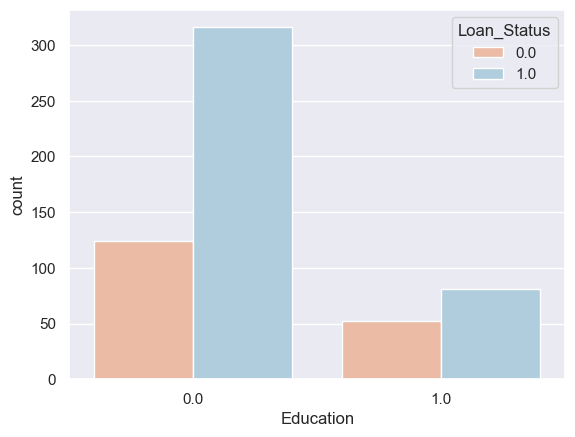

In [159]:
# Education and Loan Status
sns.countplot(x="Education", hue = "Loan_Status", data = new_data, palette="RdBu")

<Axes: xlabel='Gender', ylabel='count'>

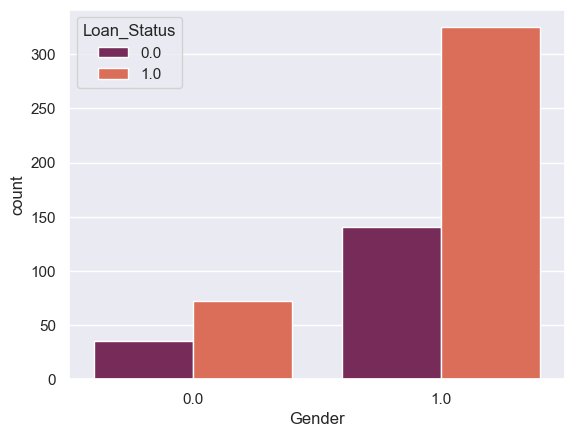

In [160]:
# Gender and Loan status
sns.countplot(x = "Gender" , hue = "Loan_Status", data= new_data, palette= "rocket")

<Axes: xlabel='Married', ylabel='count'>

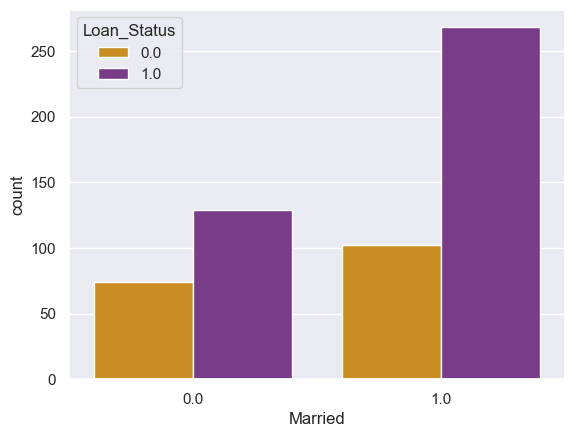

In [161]:
# Marital status and Loan Status
sns.countplot(x = "Married" , hue = "Loan_Status", data= new_data, palette= "CMRmap_r")

## Histogram Distribution

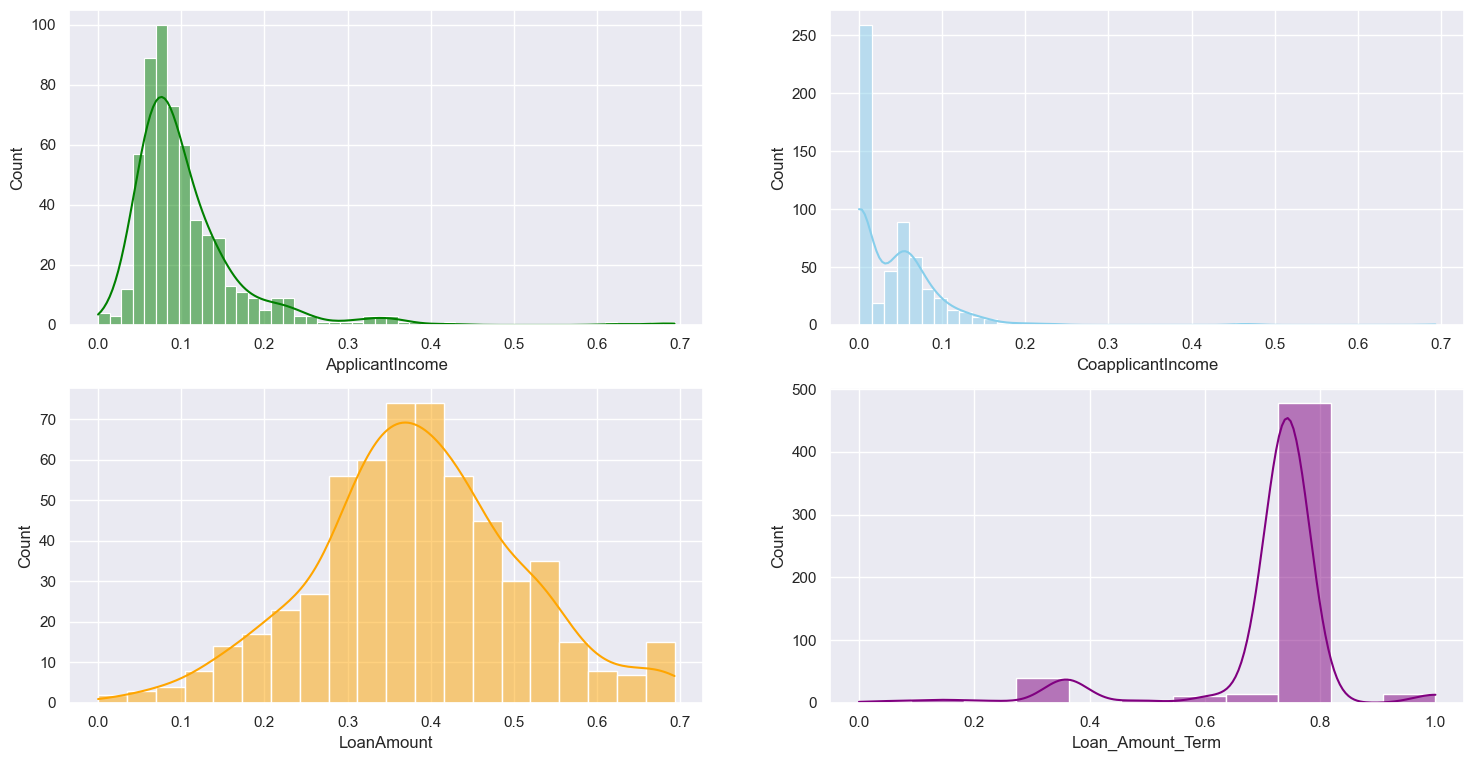

In [162]:
# Distribution numerical variable using the Histogram 

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

sns.histplot(data=new_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=new_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=new_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=new_data, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

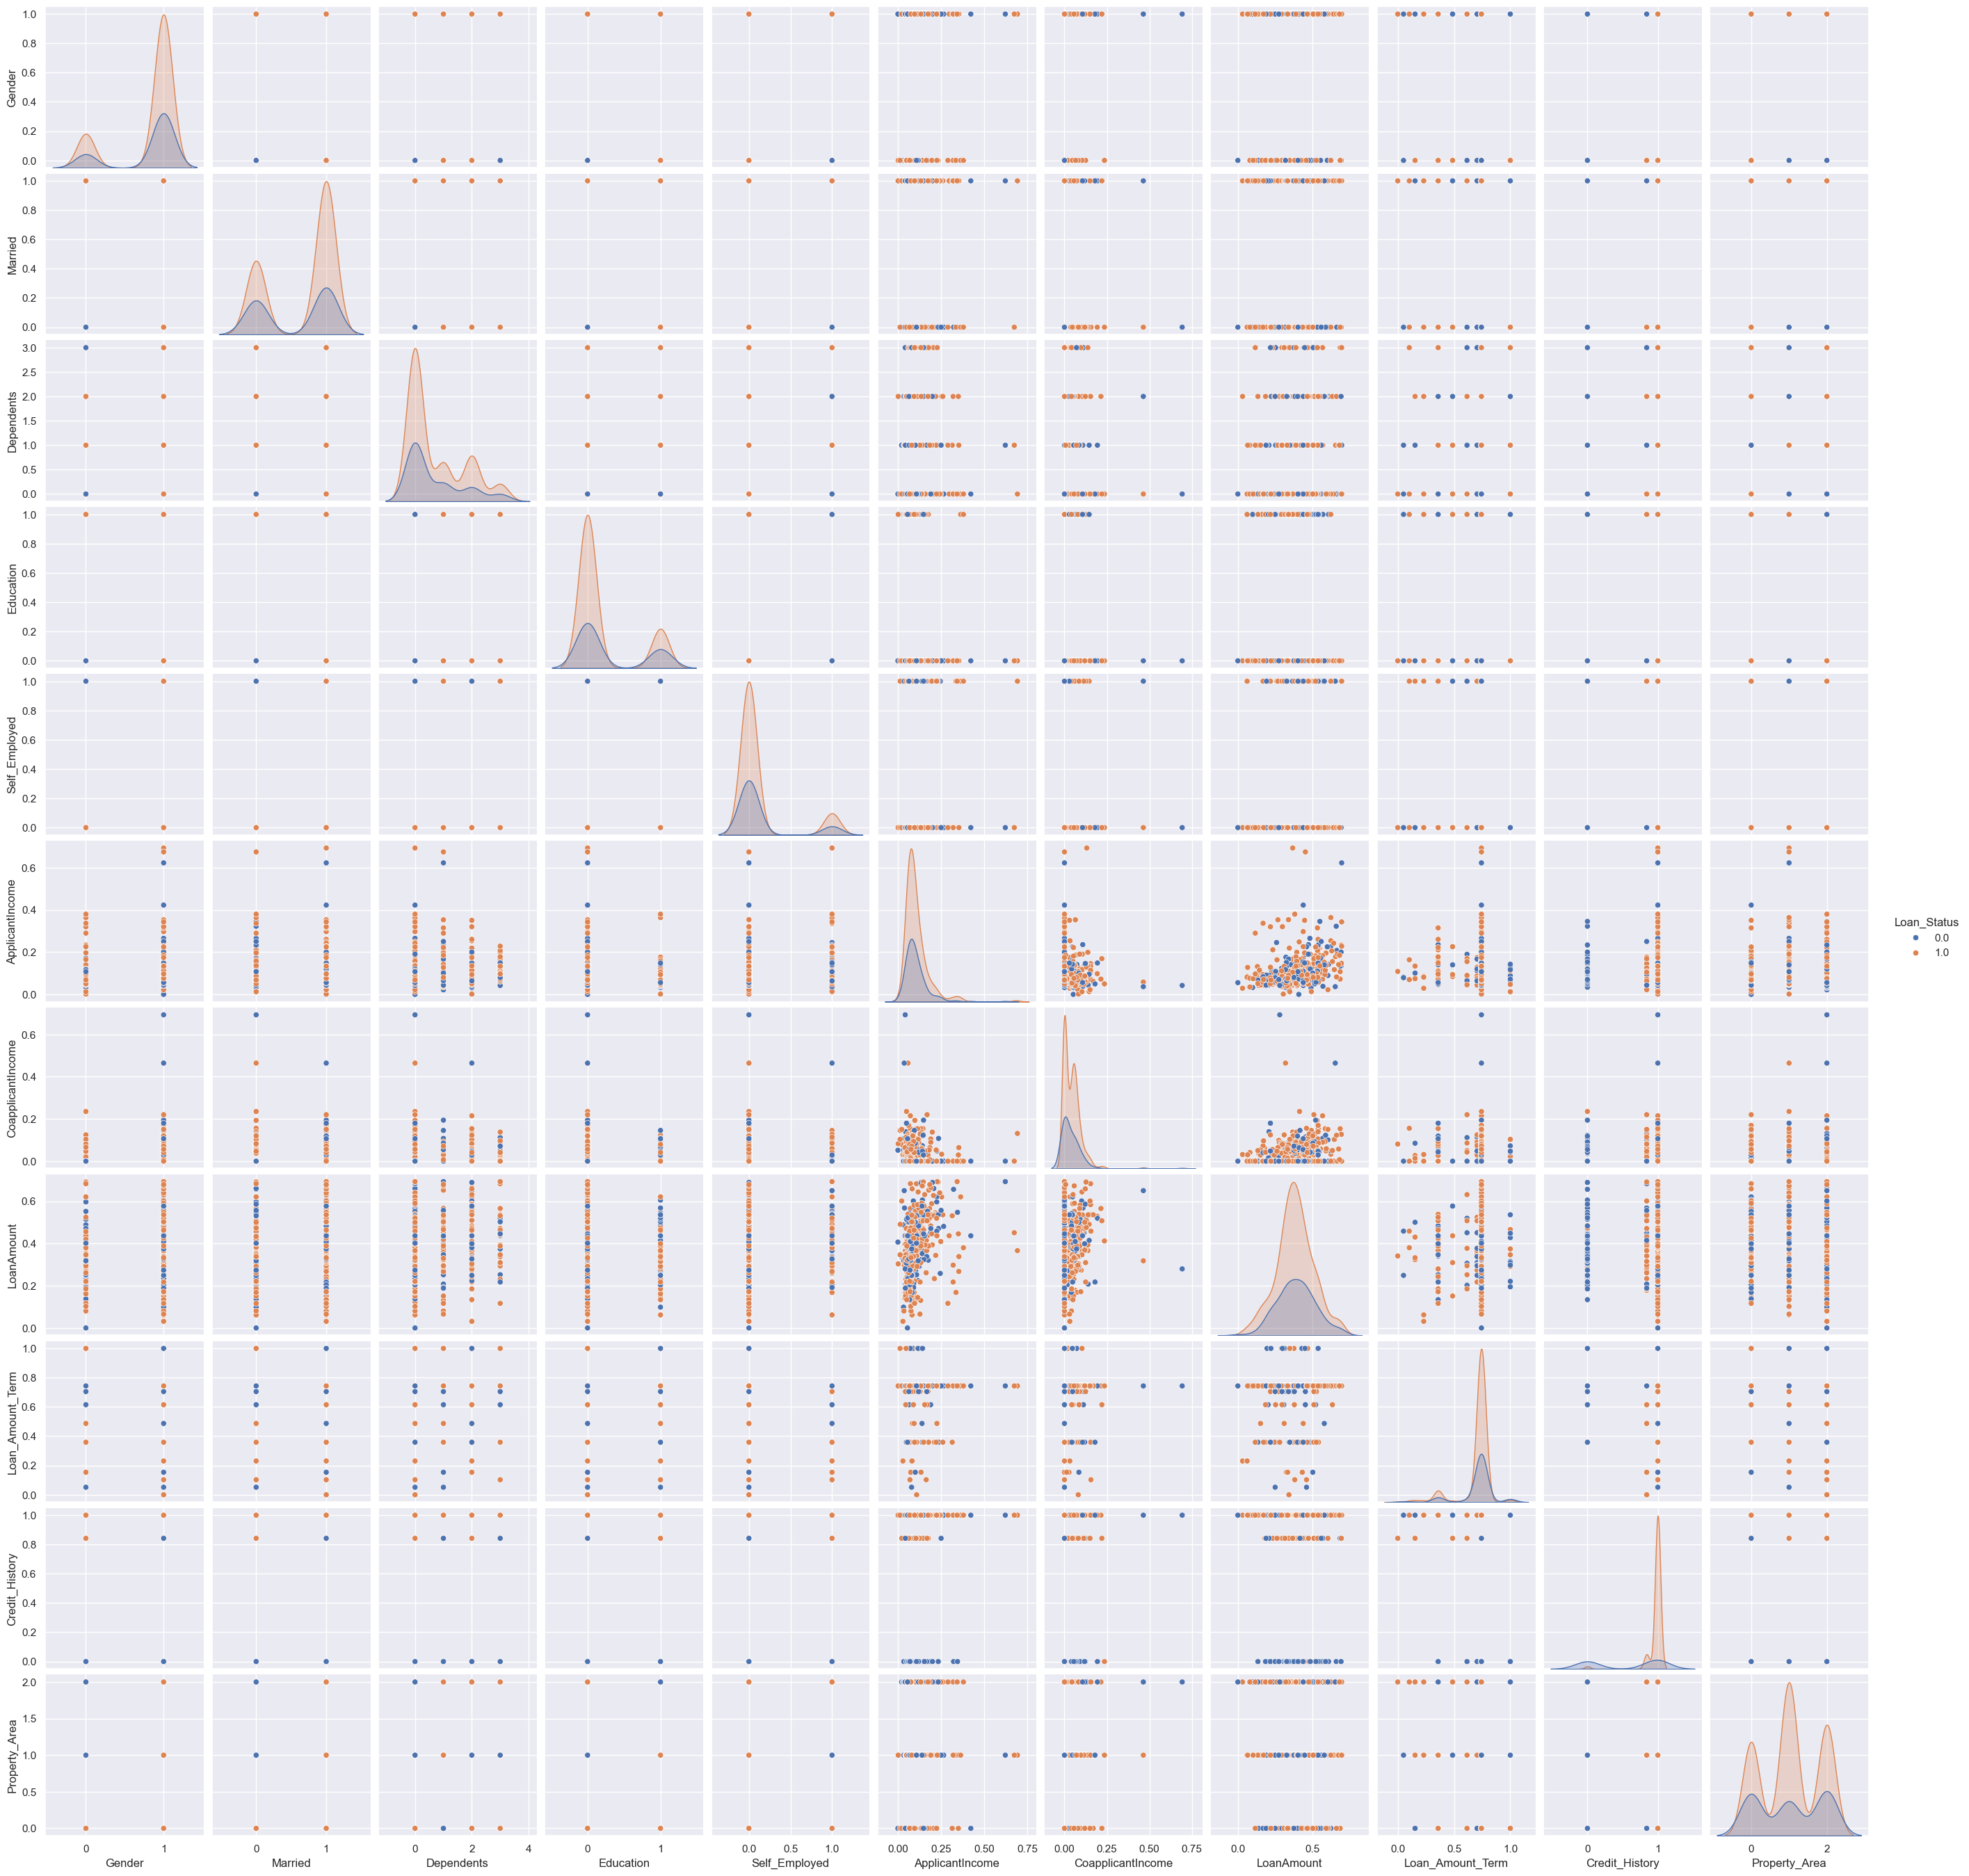

In [163]:
sns.pairplot(new_data,hue="Loan_Status")
plt.show()

## TAIN AND TEST THE DATASET

In [164]:
x = new_data.drop(columns=['Loan_Status','Loan_ID'],axis=1).iloc[:573]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,0.0,0.0,0.136399,0.000000,0.436614,0.74359,1.0,2
1,1.0,1.0,1,0.0,0.0,0.107666,0.043602,0.388050,0.74359,1.0,0
2,1.0,1.0,0,0.0,1.0,0.070535,0.000000,0.204647,0.74359,1.0,2
3,1.0,1.0,0,1.0,0.0,0.060521,0.067366,0.366191,0.74359,1.0,2
4,1.0,0.0,0,0.0,0.0,0.139772,0.000000,0.422582,0.74359,1.0,2


In [165]:
y = new_data['Loan_Status'].iloc[:573]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

## Build Machine Learing Model

In [167]:
def model_val(model,x,y):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

    score = cross_val_score(model,x,y,cv=5)
    print(f"{model} Avg cross val is {np.mean(score)}")

### Logistic Regression

LogisticRegression() accuracy is 0.8347826086956521
LogisticRegression() Avg cross val is 0.8185964912280703
Prediction: 83.47826086956522


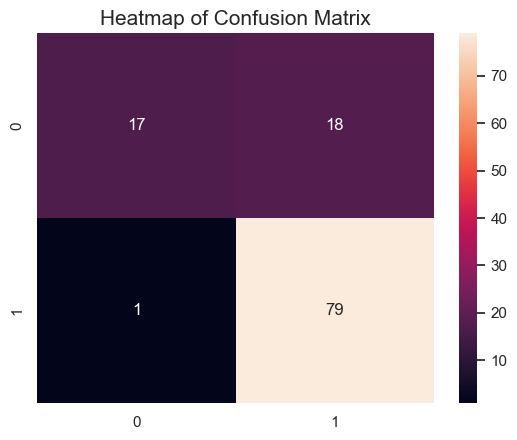

In [168]:
lr_model = LogisticRegression()
model_val(lr_model,x,y)

lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_lr)

print("Prediction:", accuracy*100)

cm = confusion_matrix(y_test, y_pred_lr)
plt.title("Heatmap of Confusion Matrix", fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

### Support Vector Machine

SVC() accuracy is 0.8347826086956521
SVC() Avg cross val is 0.8185964912280703
Prediction: 83.47826086956522


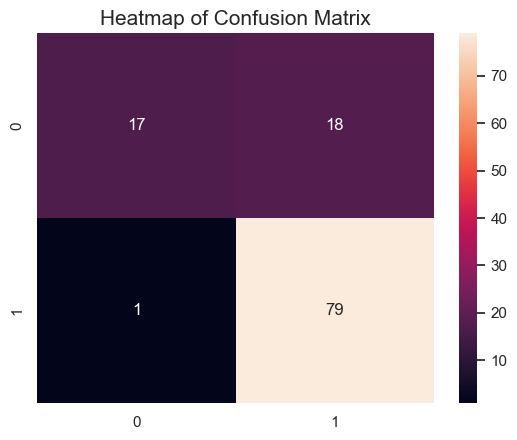

In [169]:
sv_model = svm.SVC()
model_val(sv_model,x,y)

sv_model.fit(x_train, y_train)
y_pred_sv = sv_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_sv)

print("Prediction:", accuracy*100)

cm = confusion_matrix(y_test, y_pred_sv)
plt.title("Heatmap of Confusion Matrix", fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

### Decision Tree

DecisionTreeClassifier() accuracy is 0.7304347826086957
DecisionTreeClassifier() Avg cross val is 0.7416933638443935
Prediction: 75.65217391304347


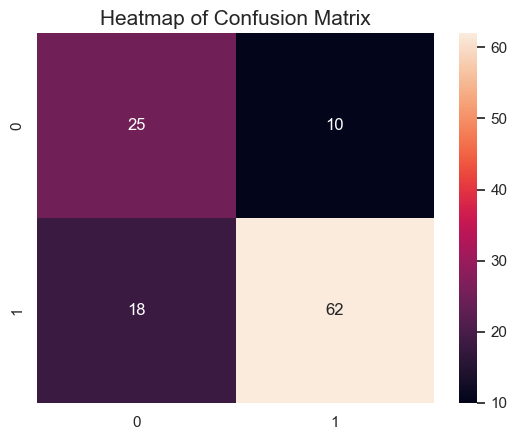

In [170]:
dt_model = DecisionTreeClassifier()
model_val(dt_model,x,y)

dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dt)

print("Prediction:", accuracy*100)

cm = confusion_matrix(y_test, y_pred_dt)
plt.title("Heatmap of Confusion Matrix", fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

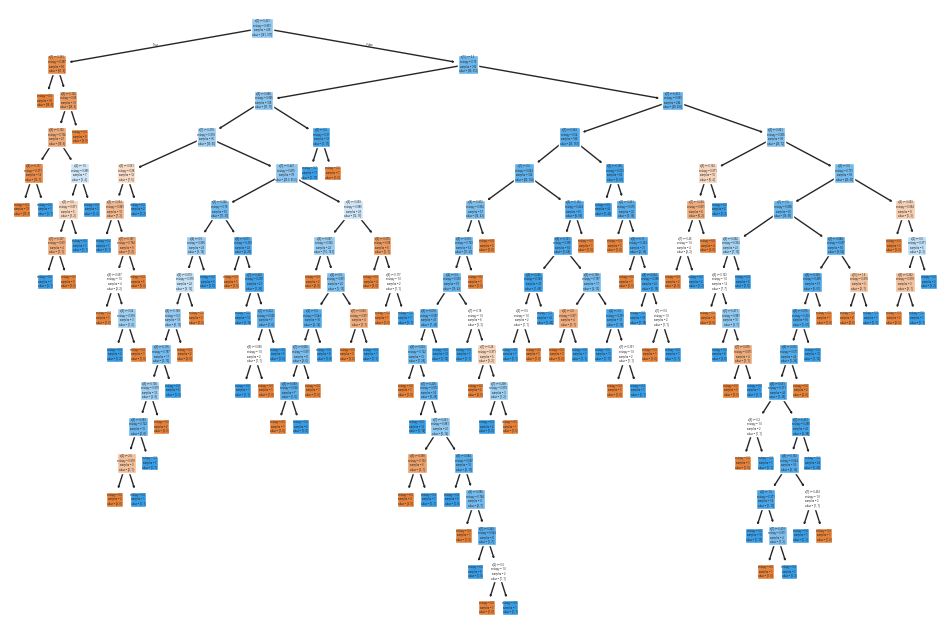

In [171]:
dt_2 = DecisionTreeClassifier(criterion="entropy", random_state=51)
dt_2.fit(x_train, y_train)
y_pred_dt_sc = dt_2.predict(x_test)
accuracy_score(y_test, y_pred_dt)

from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_2, filled=True)
plt.show()

### Random Forest Model

RandomForestClassifier() accuracy is 0.8173913043478261
RandomForestClassifier() Avg cross val is 0.7958810068649885
Prediction: 81.73913043478261


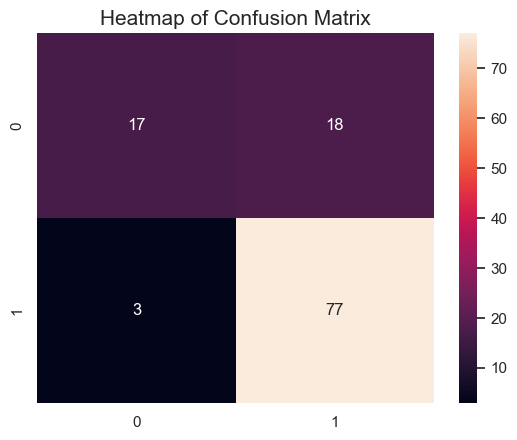

In [172]:
rf_model = RandomForestClassifier()
model_val(rf_model,x,y)

rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf)

print("Prediction:", accuracy*100)

cm = confusion_matrix(y_test, y_pred_rf)
plt.title("Heatmap of Confusion Matrix", fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

### GradientBoostingClassifier()

GradientBoostingClassifier() accuracy is 0.8
GradientBoostingClassifier() Avg cross val is 0.785446224256293
Prediction: 80.0


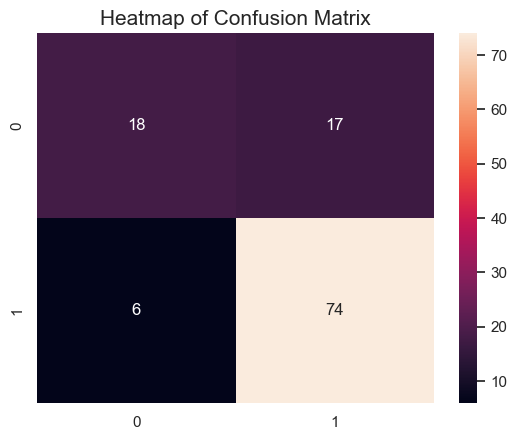

In [173]:
gbc_model = GradientBoostingClassifier()
model_val(gbc_model,x,y)

gbc_model.fit(x_train, y_train)
y_pred_gbc = gbc_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_gbc)

print("Prediction:", accuracy*100)

cm = confusion_matrix(y_test, y_pred_gbc)
plt.title("Heatmap of Confusion Matrix", fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

### K-Nearest Neighbour (KNN)

KNeighborsClassifier() accuracy is 0.7217391304347827
KNeighborsClassifier() Avg cross val is 0.7800915331807781
Prediction: 72.17391304347827


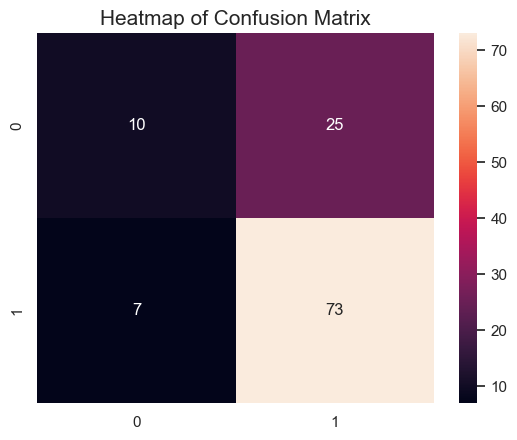

In [174]:
knn_model = KNeighborsClassifier()
model_val(knn_model,x,y)

knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_knn)

print("Prediction:", accuracy*100)

cm = confusion_matrix(y_test, y_pred_knn)
plt.title("Heatmap of Confusion Matrix", fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

### Naive Bayes
### Categorical NB

CategoricalNB() accuracy is 0.7391304347826086
CategoricalNB() Avg cross val is 0.773165522501907
Prediction: 73.91304347826086


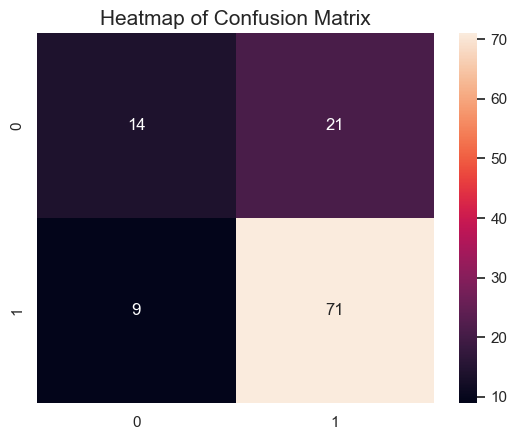

In [175]:
cnb_model = CategoricalNB()
model_val(cnb_model,x,y)

cnb_model.fit(x_train, y_train)
y_pred_cnb = cnb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_cnb)

print("Prediction:", accuracy*100)

cm = confusion_matrix(y_test, y_pred_cnb)
plt.title("Heatmap of Confusion Matrix", fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

## RESULT

### It can seen that, all the model accuracy is more than 70%.

### The highest accuracy is 83.47% of the Linear Regression and Support Vector Machine .

### The highest prediction  is 83.47% of theLinear Regression and Support Vector.

from sklearn.metrics import classification_report

# Set zero_division=0 to suppress warnings and handle undefined precision.

print(classification_report(y_test, y_pred_knn, zero_division=0))

In [176]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000000000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "Random Forest": RandomForestClassifier(n_estimators=20),
    "SVM": svm.SVC(),
    "GBC" : GradientBoostingClassifier(),
    "CNB" : CategoricalNB()
    ## "XGBoost": XGBClassifier(eval_metric="mlogloss")
}
accuracies = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

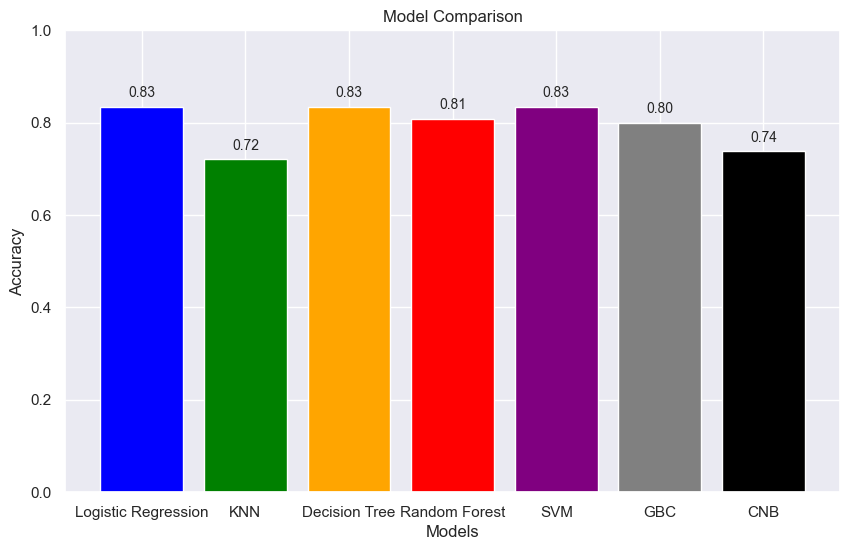

In [177]:
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies,color=['blue', 'green', 'orange', 'red', 'purple','GREY','BLACK'])
plt.title("Model Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)
plt.show()